In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

import scipy
from scipy import stats

%matplotlib notebook

In [51]:
def plot_calibrateo(Howd_we_do):
   
    #Plot the OBS plot if want
    fig = plt.figure(figsize=(4,4))
    plt.title('MODFLOW Model Calibration Results')
    plt.plot(Howd_we_do["1"], Howd_we_do["0"], '.', label = ("RMSE = 2.6 m" + "\nr$^2$ = " + "$%.2f$"%r2 ))#"r$^2$ = " + "$%.2f$"%r2 + "\nPval =" + "$%.2f$"%p_value))
    #plt.axis('equal')
    #plt.axis('square')
    plt.xlabel("Observed head [m]")
    plt.ylabel('Modeled head [m]')
    plt.ylim(0,90)
    plt.xlim(0,90)
    plt.plot([0,30,65],[0,30,65], color= "grey")
    plt.tight_layout()
    plt.legend()

    plt.savefig("cal.png")
    plt.show()
    
def make_XY_Stats(x, y): 
    mask = ~np.isnan(x) & ~np.isnan(y) # regression does not like NaN values, this line masks them out and regression is only performed on finite numbers
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])   # calculate regression stats for the ecoli and rainfall data
    rmse = np.sqrt(np.mean(np.abs(x-y)**2))
    r2 = r_value**2
    rX = np.linspace(min(x), max(x), 50)
    rY = slope*rX + intercept
    
    return r2,  p_value, rX, rY # slope, intercept, r_value, add if needed 

<IPython.core.display.Javascript object>


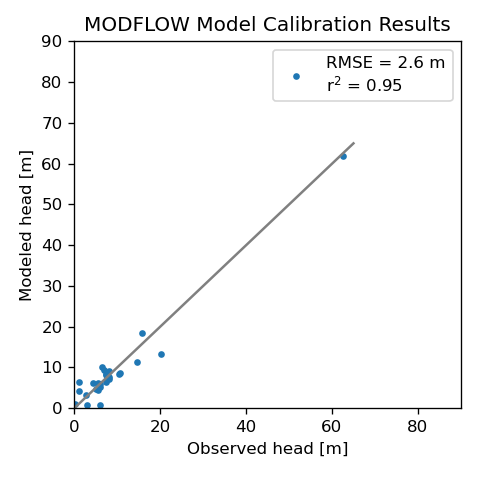

In [52]:
Howd_we_do = pd.read_csv('FinalModelObs.csv')

x = Howd_we_do["1"]
y = Howd_we_do["0"]

r2,  p_value, rX, rY = make_XY_Stats(x, y)



plot_calibrateo(Howd_we_do)